<div style="border-radius:10px;
            border:#0b0265 solid;
           background-color:#DDF6A0;
           font-size:110%;
           letter-spacing:0.5px;
            text-align: center">

<center><h1 style="padding: 25px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Air Ticket Demand Forecasting 🛫 🛩 </h1></center>    

</div>

<p align="center">
  <img width="700" height="400" src="https://btl-company.com/wp-content/uploads/2020/02/shutterstock_1033826125-1024x683.jpg">
</p>

## Table of Contents

***

- [1. Import Libraries and Data](#Import_Libraries_and_Data)
- [2. Handling Missing Values](#Handling_Missing_Values)
- [3. Data Analysis and Visualization](#Data_Analysis_and_Visualization)
- [4. Dataset Splitting](#Dataset_Splitting)
- [5. Decomposition](#Decomposition)
- [6. Stationary](#Stationary)
- [7. Modeling](#Modeling)
- [8. AR](#AR)
- [9. ARMA](#ARMA)

1. What is Time series analysis?

Time Series is a series of observations taken at specified time intervals usually equal intervals. Analysis of the series helps us to predict future values based on previous observed values. In Time series, we have only 2 variables, time & the variable we want to forecast.

2. Why & where Time Series is used?

Time series data can be analysed in order to extract meaningful statistics and other charecteristsics. It's used in atleast the 4 scenarios:

a) Business Forecasting

b) Understand past behavior

c) Plan the future

d) Evaluate current accomplishment

3. When shouldn't we use Time Series Analysis?

We don't need to apply Time series in at least the following 2 cases:

a) The dependant variable(y) (that is supposed to vary with time) is constant. Eq: y=f(x)=4, a line parallel to x-axis(time) will always remain the same.

b) The dependant variable(y) represent values that can be denoted as a mathematical function. Eq: sin(x), log(x), Polynomials etc. Thus, we can directly get value at some time using the function itself.

# <a name='Import_Libraries_and_Data'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
1. Import Libraries and Data</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import pylab
import math
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.special import boxcox, inv_boxcox
from statsmodels.tsa.arima.model import ARIMA

In [2]:
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'])

# <a name='Handling_Missing_Values'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
2. Handling Missing Values</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

let's find if we have missing values in the dataset.

In [3]:
data.isnull().sum()

Month          0
#Passengers    0
dtype: int64

let's find if we have duplicate rows.

In [4]:
data.duplicated().sum()

0

# <a name='Data_Analysis_and_Visualization'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
3. Data Analysis and Visualization</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

In [5]:
data.head(7)

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
5,1949-06-01,135
6,1949-07-01,148


In [6]:
data.shape

(144, 2)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [8]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [9]:
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data = data.set_index('Month')
data.head(7)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148


In [10]:
data.shape

(144, 1)

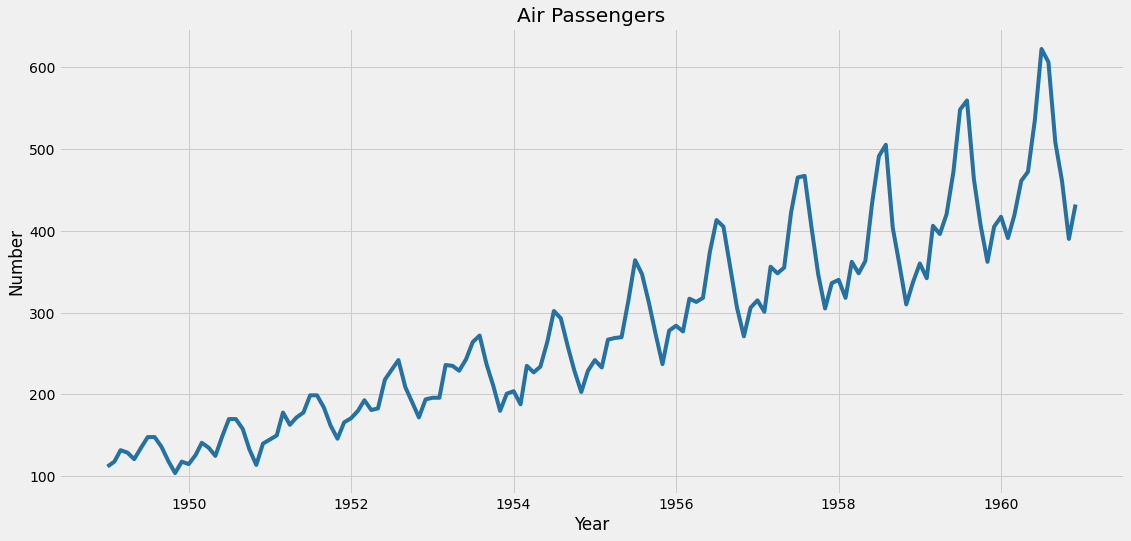

In [11]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(17,8))
plt.plot(data, color='#2471A3')
plt.title('Air Passengers')
plt.xlabel('Year')
plt.ylabel('Number');

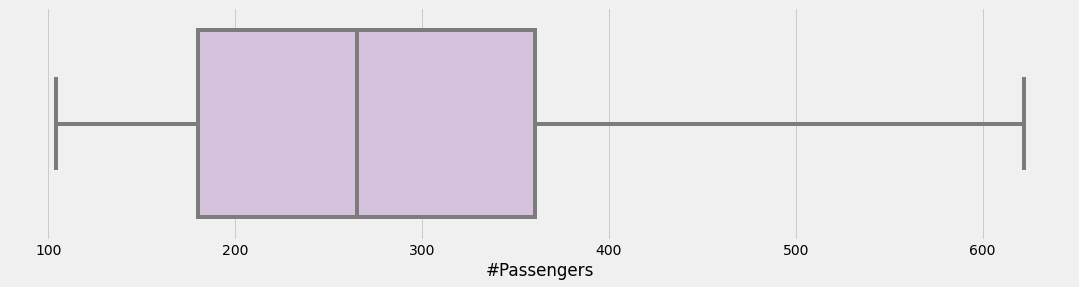

In [12]:
plt.figure(figsize = (17,4))
sns.boxplot(x=data['#Passengers'], color='#D7BDE2');

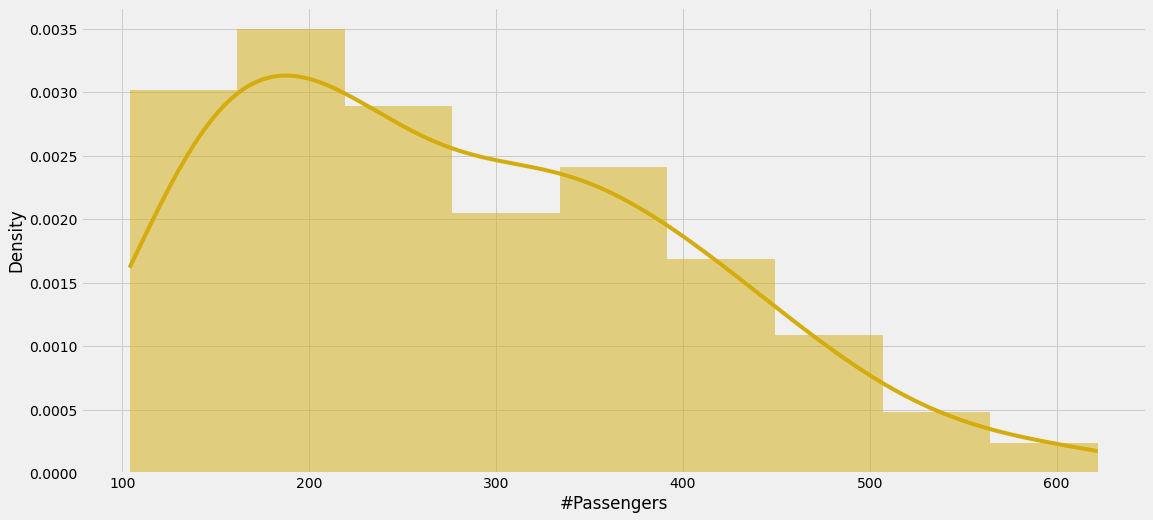

In [13]:
plt.figure(figsize = (17,8))
sns.histplot(data['#Passengers'], color='#D4AC0D', label='100% Equities', kde=True, stat='density', linewidth=0);

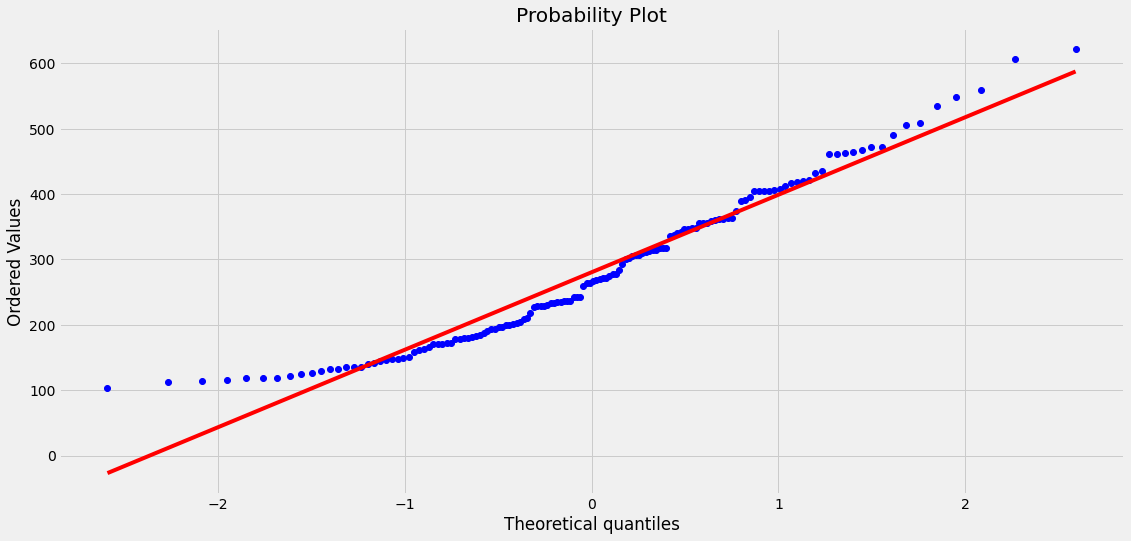

In [14]:
plt.figure(figsize = (17,8))
stats.probplot(data['#Passengers'], plot=pylab);

# <a name='Dataset_Splitting'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
4. Dataset Splitting</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

In [15]:
num_train = math.floor(len(data['#Passengers'])*0.8)

train = data[:num_train]
test = data[num_train:]

# <a name='Decomposition'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
5. Decomposition</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

There are 4 components of Time Series:

a) Trend: Upward & downward movement of the data with time over a large period of time. Eq: Appreciation of Dollar vs rupee.

b) Seasonality: seasonal variances. Eq: Ice cream sales increases in Summer only

c) Noise or Irregularity: Spikes & troughs at random intervals

d) Cyclicity: behavior that repeats itself after large interval of time, like months, years etc.

------------------------------------------------------------------------------------------------------------------------------------------
                                                                    additive
------------------------------------------------------------------------------------------------------------------------------------------ 



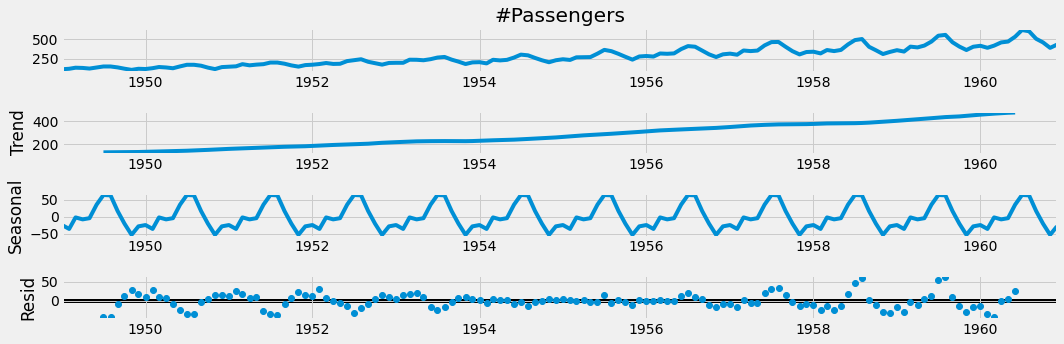

In [16]:
plt.rcParams['figure.figsize']=(15,5)
print('-'*138)
print(' '*67,'additive')
print('-'*138,'\n')
sm.tsa.seasonal_decompose(data['#Passengers'], model='additive').plot();

------------------------------------------------------------------------------------------------------------------------------------------
                                                                  multiplicative
------------------------------------------------------------------------------------------------------------------------------------------ 



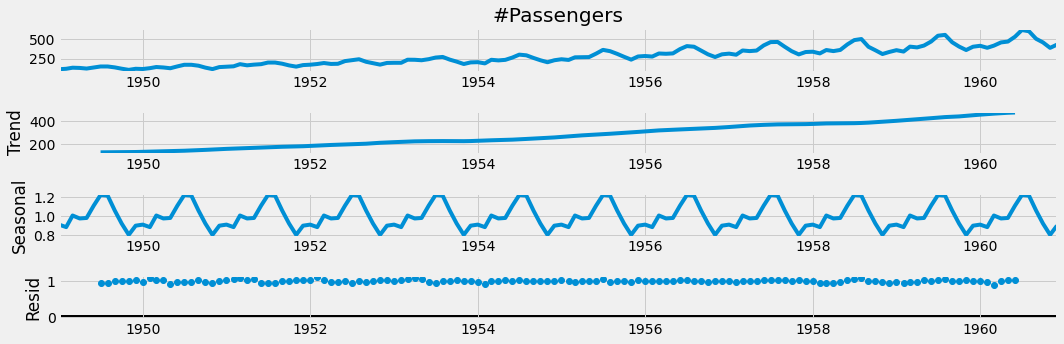

In [17]:
plt.rcParams['figure.figsize']=(15,5)
print('-'*138)
print(' '*65,'multiplicative')
print('-'*138,'\n')
sm.tsa.seasonal_decompose(data['#Passengers'], model='multiplicative').plot();

# <a name='Stationary'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
6. Stationary</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

What is Stationarity?

Before applying any statistical model on a Time Series, the series has to be staionary, which means that, over different time periods,

a) It should have constant mean.

b) It should have constant variance or standard deviation.

c) Auto-covariance should not depend on time.

Trend & Seasonality are two reasons why a Time Series is not stationary & hence need to be corrected.

Why does Time Series(TS) need to be stationary?

It is because of the following reasons:

a) If a TS has a particular behavior over a time interval, then there's a high probability that over a different interval, it will have same behavior, provided TS is stationary. This helps in forecasting accurately.

b) Theories & Mathematical formulas ae more mature & easier to apply for as TS which is stationary.

Tests to check if a series is stationary or not

There are 2 ways to check for Stationarity of a TS:

a) Rolling Statistics - Plot the moving avg or moving standard deviation to see if it varies with time. Its a visual technique.

b) ADCF Test - Augmented Dickey–Fuller test is used to gives us various values that can help in identifying stationarity. The Null hypothesis says that a TS is non-stationary. It comprises of a Test Statistics & some critical values for some confidence levels. If the Test statistics is less than the critical values, we can reject the null hypothesis & say that the series is stationary. THE ADCF test also gives us a p-value. Acc to the null hypothesis, lower values of p is better.

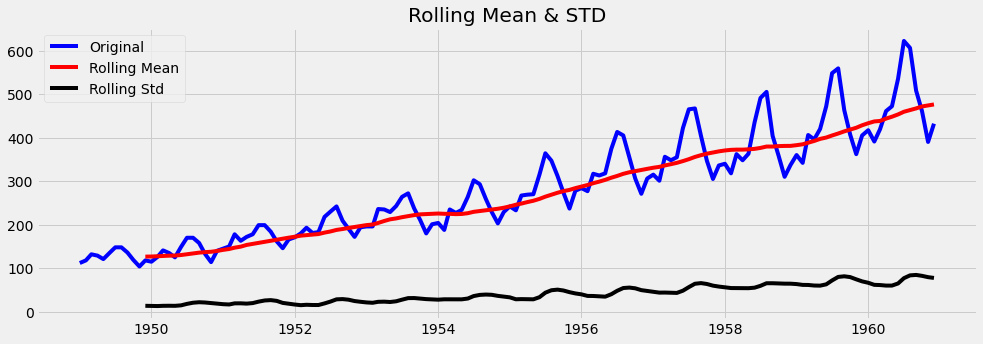

In [18]:
rolmean = data.rolling(window=12).mean()
rolstd = data.rolling(window=12).std()
orig = plt.plot(data, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & STD');

From the above graph, we see that rolling mean itself has a trend component even though rolling standard deviation is fairly constant with time. For our time series to be stationary, we need to ensure that both the rolling statistics ie: mean & std. dev. remain time invariant or constant with time. Thus the curves for both of them have to be parallel to the x-axis, which in our case is not so.

To further augment our hypothesis that the time series is not stationary, let us perform the ADCF test.

In [19]:
def ADF(data):
    result = adfuller(data)
    print(f'ADF Statistic: {result[0]}')
    print(f'n_lags: {result[2]}')
    print(f'p-value: {result[1]:.20f}')
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'{key}, {value}')

ADF(data['#Passengers'])

ADF Statistic: 0.8153688792060472
n_lags: 13
p-value: 0.99188024343764102930
Critial Values:
1%, -3.4816817173418295
Critial Values:
5%, -2.8840418343195267
Critial Values:
10%, -2.578770059171598


Based-on adfuller:
p-value = 0.99 (p-value > 0.05) --> H0 Accepted --> The data is non-stationary

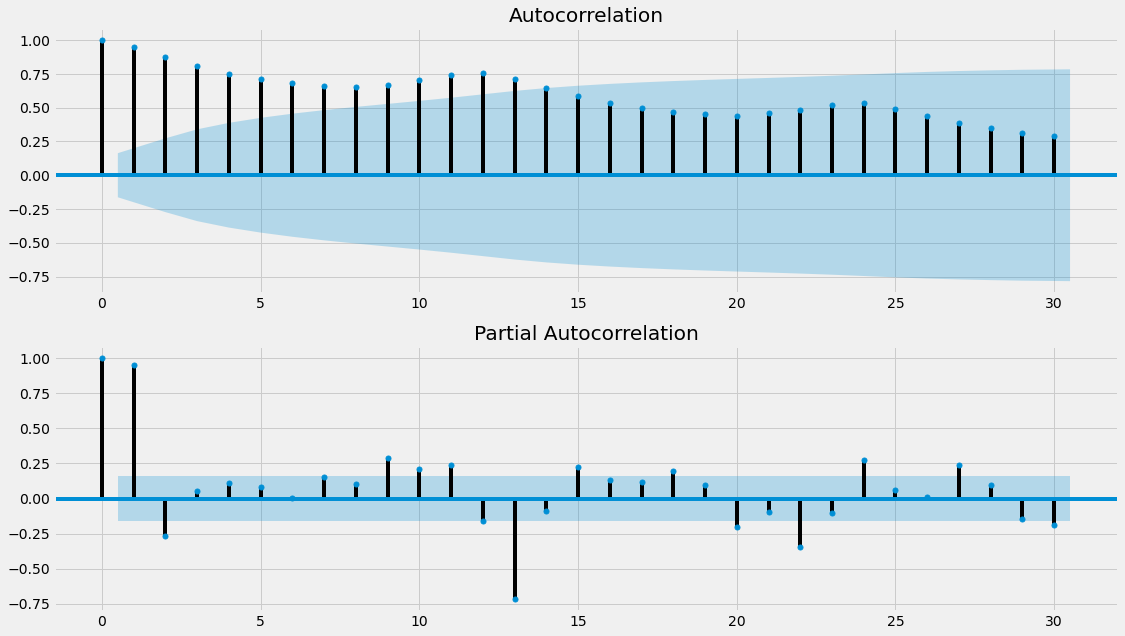

In [20]:
def ACF_and_PACF(data):
    fig = plt.figure(figsize=(17,10))
    ax1 = fig.add_subplot(211)
    fig = plot_acf(data, lags=30, ax=ax1) 
    ax2 = fig.add_subplot(212)
    fig = plot_pacf(data, lags=30, ax=ax2)

ACF_and_PACF(data['#Passengers'])    

In this time series, we have seasonal components and non-constant variance and mean. To eliminate these non-stationary, we do the following:

Elimination non-constant variance

Elimination seasonal components

Elimination non-constant mean

#### Elimination non-constant variance

--------------------------------------------------
      fitted_lambda is:  0.14802265137037945
-------------------------------------------------- 



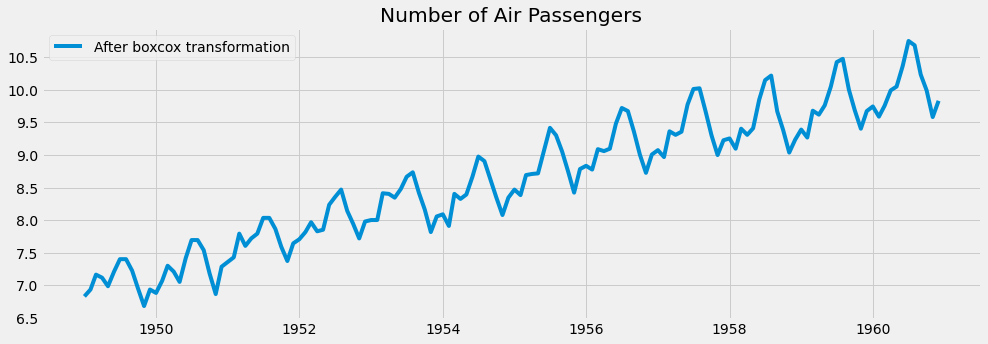

In [21]:
fitted_data, fitted_lambda = stats.boxcox(data['#Passengers'])
print('-'*50)
print(' '*5,'fitted_lambda is: ', fitted_lambda)
print('-'*50,'\n')

data_boxcox = pd.Series(boxcox(data['#Passengers'], fitted_lambda), index=data.index)
plt.plot(data_boxcox, label='After boxcox transformation')
plt.legend()
plt.title('Number of Air Passengers');

In [22]:
ADF(data_boxcox)

ADF Statistic: -1.3260708968567636
n_lags: 13
p-value: 0.61716206570036413748
Critial Values:
1%, -3.4816817173418295
Critial Values:
5%, -2.8840418343195267
Critial Values:
10%, -2.578770059171598


###Elimination seasonal components with differencing

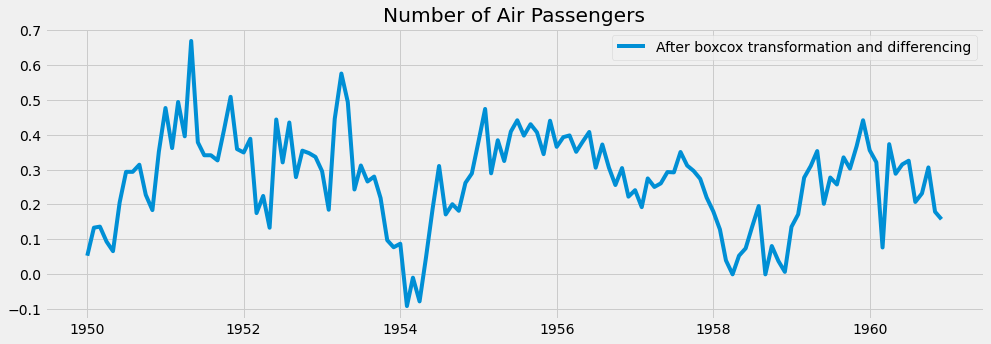

In [23]:
data_boxcox_diff_12 = pd.Series(data_boxcox - data_boxcox.shift(periods=12), index=data.index)
data_boxcox_diff_12.dropna(inplace=True)

plt.plot(data_boxcox_diff_12, label='After boxcox transformation and differencing')
plt.legend()
plt.title('Number of Air Passengers');

In [24]:
ADF(data_boxcox_diff_12)

ADF Statistic: -2.842113458410027
n_lags: 12
p-value: 0.05250539863856163586
Critial Values:
1%, -3.4865346059036564
Critial Values:
5%, -2.8861509858476264
Critial Values:
10%, -2.579896092790057


### Elimination non-constant mean with differencing

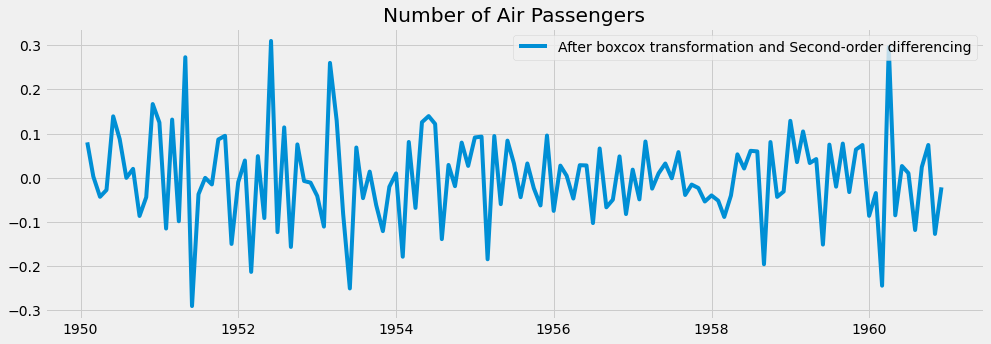

In [25]:
data_boxcox_second_order_diff= pd.Series(data_boxcox_diff_12 - data_boxcox_diff_12.shift(), index=data.index)
data_boxcox_second_order_diff.dropna(inplace=True)

plt.plot(data_boxcox_second_order_diff, label='After boxcox transformation and Second-order differencing')
plt.legend(loc='upper right')
plt.title('Number of Air Passengers');

In [26]:
ADF(data_boxcox_second_order_diff)

ADF Statistic: -4.393872588707452
n_lags: 12
p-value: 0.00030433262632178945
Critial Values:
1%, -3.4870216863700767
Critial Values:
5%, -2.8863625166643136
Critial Values:
10%, -2.580009026141913


Based-on adfuller:
p-value < 0.05 --> H0 Reject --> The data is stationary

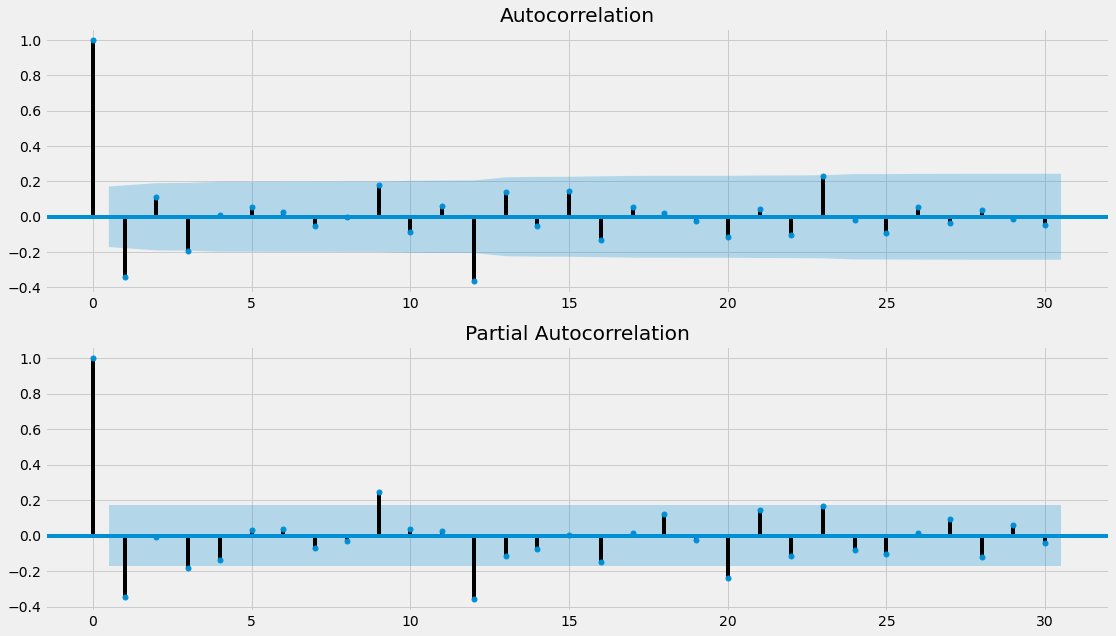

In [27]:
ACF_and_PACF(data_boxcox_second_order_diff)

# <a name='Modeling'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
7. Modeling</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

In [28]:
train_boxcox_second_order_diff = data_boxcox_second_order_diff[:num_train]
test_boxcox_second_order_diff = data_boxcox_second_order_diff[num_train:]

In [29]:
train_boxcox_second_order_diff.tail()

Month
1959-04-01    0.033505
1959-05-01    0.042581
1959-06-01   -0.150944
1959-07-01    0.075219
1959-08-01   -0.019876
Name: #Passengers, dtype: float64

In [30]:
test_boxcox_second_order_diff.head()

Month
1959-09-01    0.077554
1959-10-01   -0.032159
1959-11-01    0.064099
1959-12-01    0.074289
1960-01-01   -0.085853
Name: #Passengers, dtype: float64

What is ARIMA model?

ARIMA(Auto Regressive Integrated Moving Average) is a combination of 2 models AR(Auto Regressive) & MA(Moving Average). It has 3 hyperparameters - P(auto regressive lags),d(order of differentiation),Q(moving avg.) which respectively comes from the AR, I & MA components. The AR part is correlation between prev & current time periods. To smooth out the noise, the MA part is used. The I part binds together the AR & MA parts.

How to find value of P & Q for ARIMA?

A. We need to take help of ACF(Auto Correlation Function) & PACF(Partial Auto Correlation Function) plots. ACF & PACF graphs are used to find value of P & Q for ARIMA. We need to check, for which value in x-axis, graph line drops to 0 in y-axis for 1st time.

From PACF(at y=0), get P

From ACF(at y=0), get Q

# <a name='AR'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
8. AR</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

In [31]:
model_ar = ARIMA(train_boxcox_second_order_diff, order=(12,0,0))
model_fit_ar = model_ar.fit()
model_fit_ar.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  115
Model:                ARIMA(12, 0, 0)   Log Likelihood                 121.997
Date:                Fri, 02 Dec 2022   AIC                           -215.994
Time:                        11:54:16   BIC                           -177.565
Sample:                    02-01-1950   HQIC                          -200.396
                         - 08-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.005      0.183      0.855      -0.009       0.011
ar.L1         -0.3218      0.084     -3.815      0.000      -0.487      -0.156
ar.L2         -0.0157      0.110     -0.144      0.886      -0.231       0.199
ar.L3         -0.1334      0.107     -1.244      0.214      -0.344       0.077
ar.L4         -0.0969      0.116     -0.834      0.404      -0.324       0.131
ar.L5          0.0099      0.087      0.114      0.909      -0.160       0.180
ar.L6          0.0587      0.094      0.628      0.530      -0.125       0.242
ar.L7         -0.0452      0.107     -0.423      0.672      -0.255       0.164
ar.L8         -0.0028      0.093     -0.030      0.976      -0.186       0.180
ar.L9          0.1305      0.094      1.383      0.167      -0.054       0.315
ar.L10         0.0242      0.099      0.245      0.807      -0.170       0.218
ar.L11        -0.1132      0.096     -1.176      0.240      -0.302       0.076
ar.L12        -0.3798      0.090     -4.210      0.000      -0.557      -0.203
sigma2         0.0069      0.001      6.894      0.000       0.005       0.009
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 1.33
Prob(Q):                              0.71   Prob(JB):                         0.51
Heteroskedasticity (H):               0.54   Skew:                             0.26
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
predictions_AR_diff = pd.Series(model_fit_ar.fittedvalues, copy=True)
print(predictions_AR_diff.head())

Month
1950-02-01    0.000934
1950-03-01   -0.024041
1950-04-01    0.001496
1950-05-01   -0.000406
1950-06-01    0.003956
dtype: float64


In [33]:
predictions_AR_diff_cumsum = predictions_AR_diff.cumsum()
print(predictions_AR_diff_cumsum)

Month
1950-02-01    0.000934
1950-03-01   -0.023107
1950-04-01   -0.021612
1950-05-01   -0.022018
1950-06-01   -0.018062
                ...   
1959-04-01    0.136132
1959-05-01    0.088932
1959-06-01    0.021163
1959-07-01    0.041439
1959-08-01    0.005585
Length: 115, dtype: float64


In [34]:
predictions_AR_boxcox = pd.Series(data_boxcox, index=data_boxcox.index)
predictions_AR_boxcox

Month
1949-01-01     6.827490
1949-02-01     6.932822
1949-03-01     7.161892
1949-04-01     7.114611
1949-05-01     6.983787
                ...    
1960-08-01    10.684049
1960-09-01    10.234573
1960-10-01     9.992159
1960-11-01     9.582623
1960-12-01     9.831860
Name: #Passengers, Length: 144, dtype: float64

In [35]:
predictions_AR_boxcox = pd.Series(data_boxcox, index=data_boxcox.index)
predictions_AR_boxcox = predictions_AR_boxcox.add(predictions_AR_diff_cumsum, fill_value=0)
predictions_AR_boxcox.head()

Month
1949-01-01    6.827490
1949-02-01    6.932822
1949-03-01    7.161892
1949-04-01    7.114611
1949-05-01    6.983787
dtype: float64

In [36]:
predictions_AR = inv_boxcox(predictions_AR_boxcox, fitted_lambda)
predictions_AR.head()

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
dtype: float64

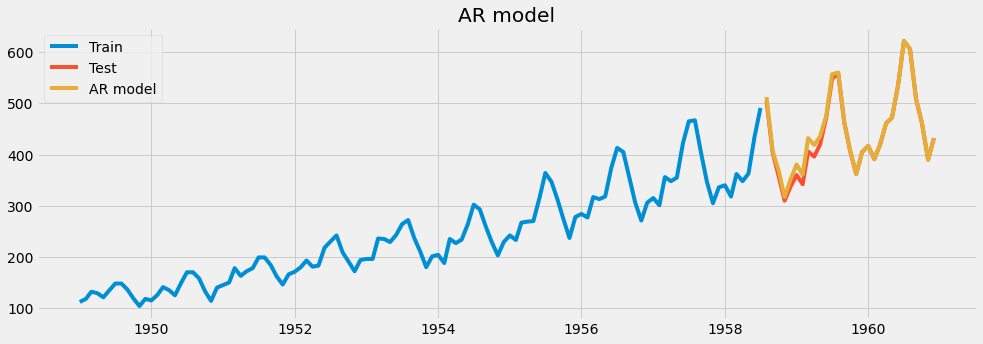

In [37]:
plt.plot(train['#Passengers'], label = 'Train')
plt.plot(test['#Passengers'], label = 'Test')
plt.plot(predictions_AR[test.index.min():], label = 'AR model')

plt.legend()
plt.title('AR model');

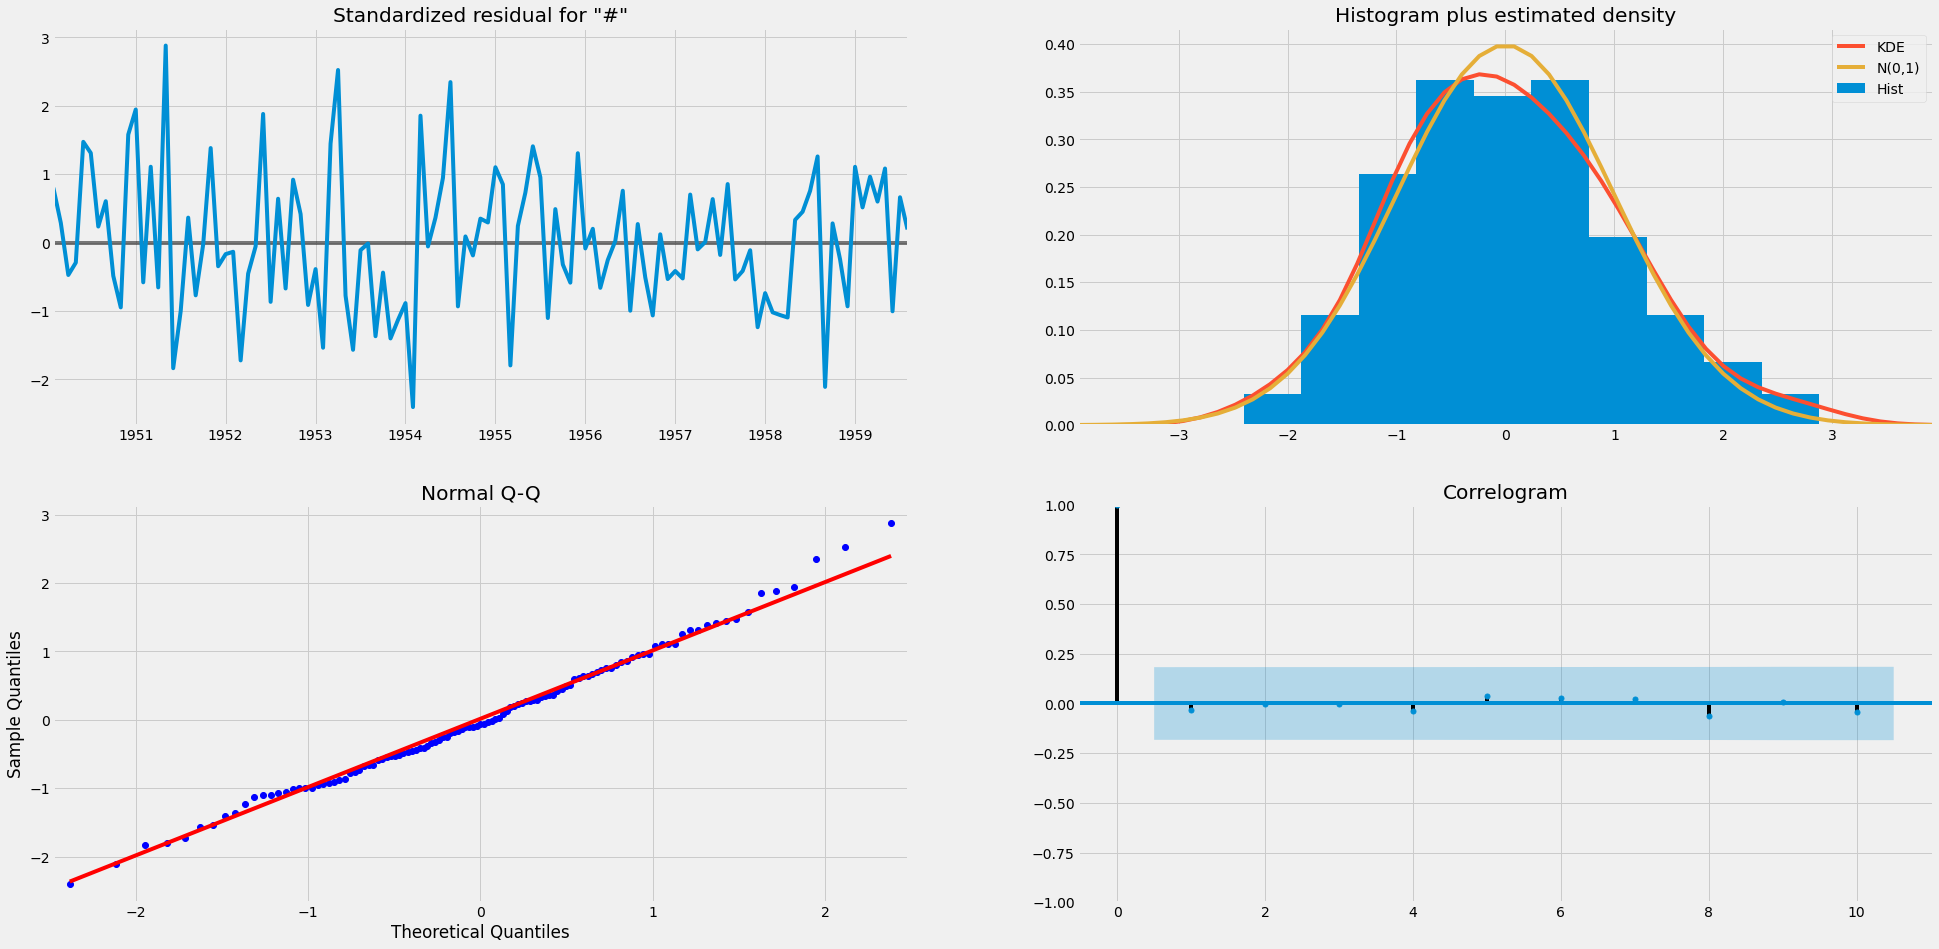

In [38]:
x = model_fit_ar.plot_diagnostics(figsize=(30,15))

# <a name='ARMA'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
9. ARMA</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

In [39]:
model_arma = ARIMA(train_boxcox_second_order_diff, order=(6,0,6))
model_fit_arma = model_arma.fit()
model_fit_arma.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  115
Model:                 ARIMA(6, 0, 6)   Log Likelihood                 121.119
Date:                Fri, 02 Dec 2022   AIC                           -214.239
Time:                        11:54:22   BIC                           -175.810
Sample:                    02-01-1950   HQIC                          -198.641
                         - 08-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0016      0.007      0.219      0.826      -0.013       0.016
ar.L1         -0.0627      0.348     -0.180      0.857      -0.744       0.619
ar.L2          0.2007      0.249      0.807      0.420      -0.287       0.688
ar.L3         -0.5896      0.218     -2.709      0.007      -1.016      -0.163
ar.L4          0.3541      0.198      1.786      0.074      -0.035       0.743
ar.L5          0.0173      0.275      0.063      0.950      -0.521       0.556
ar.L6         -0.5110      0.173     -2.954      0.003      -0.850      -0.172
ma.L1         -0.1775      0.352     -0.505      0.614      -0.867       0.511
ma.L2         -0.1072      0.316     -0.339      0.735      -0.727       0.512
ma.L3          0.4420      0.161      2.745      0.006       0.126       0.757
ma.L4         -0.6454      0.295     -2.189      0.029      -1.223      -0.068
ma.L5          0.3676      0.315      1.167      0.243      -0.250       0.985
ma.L6          0.4749      0.273      1.737      0.082      -0.061       1.011
sigma2         0.0068      0.002      3.934      0.000       0.003       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 0.63
Prob(Q):                              0.66   Prob(JB):                         0.73
Heteroskedasticity (H):               0.46   Skew:                             0.16
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
pred_ARMA_diff = pd.Series(model_fit_arma.fittedvalues, copy=True)
pred_ARMA_diff_cumsum = pred_ARMA_diff.cumsum()

pred_ARMA_boxcox = pd.Series(data_boxcox, index=data_boxcox.index)
pred_ARMA_boxcox = pred_ARMA_boxcox.add(pred_ARMA_diff_cumsum, fill_value=0)

pred_ARMA = inv_boxcox(pred_ARMA_boxcox, fitted_lambda)

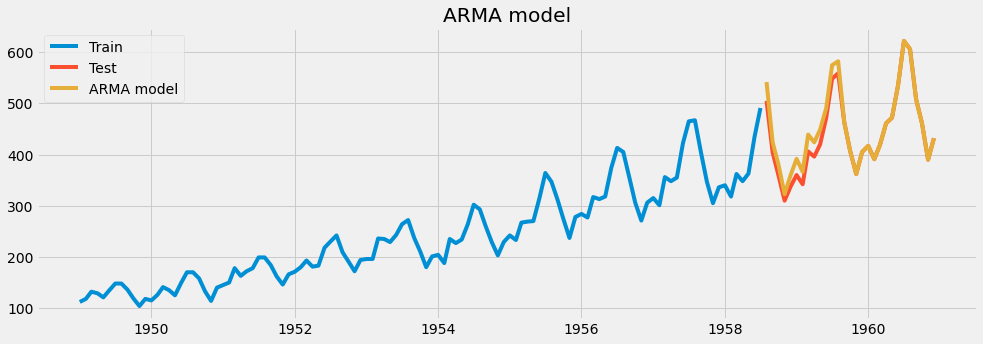

In [41]:
plt.plot(train['#Passengers'], label = 'Train')
plt.plot(test['#Passengers'], label = 'Test')
plt.plot(pred_ARMA[test.index.min():], label = 'ARMA model')

plt.legend()
plt.title('ARMA model');

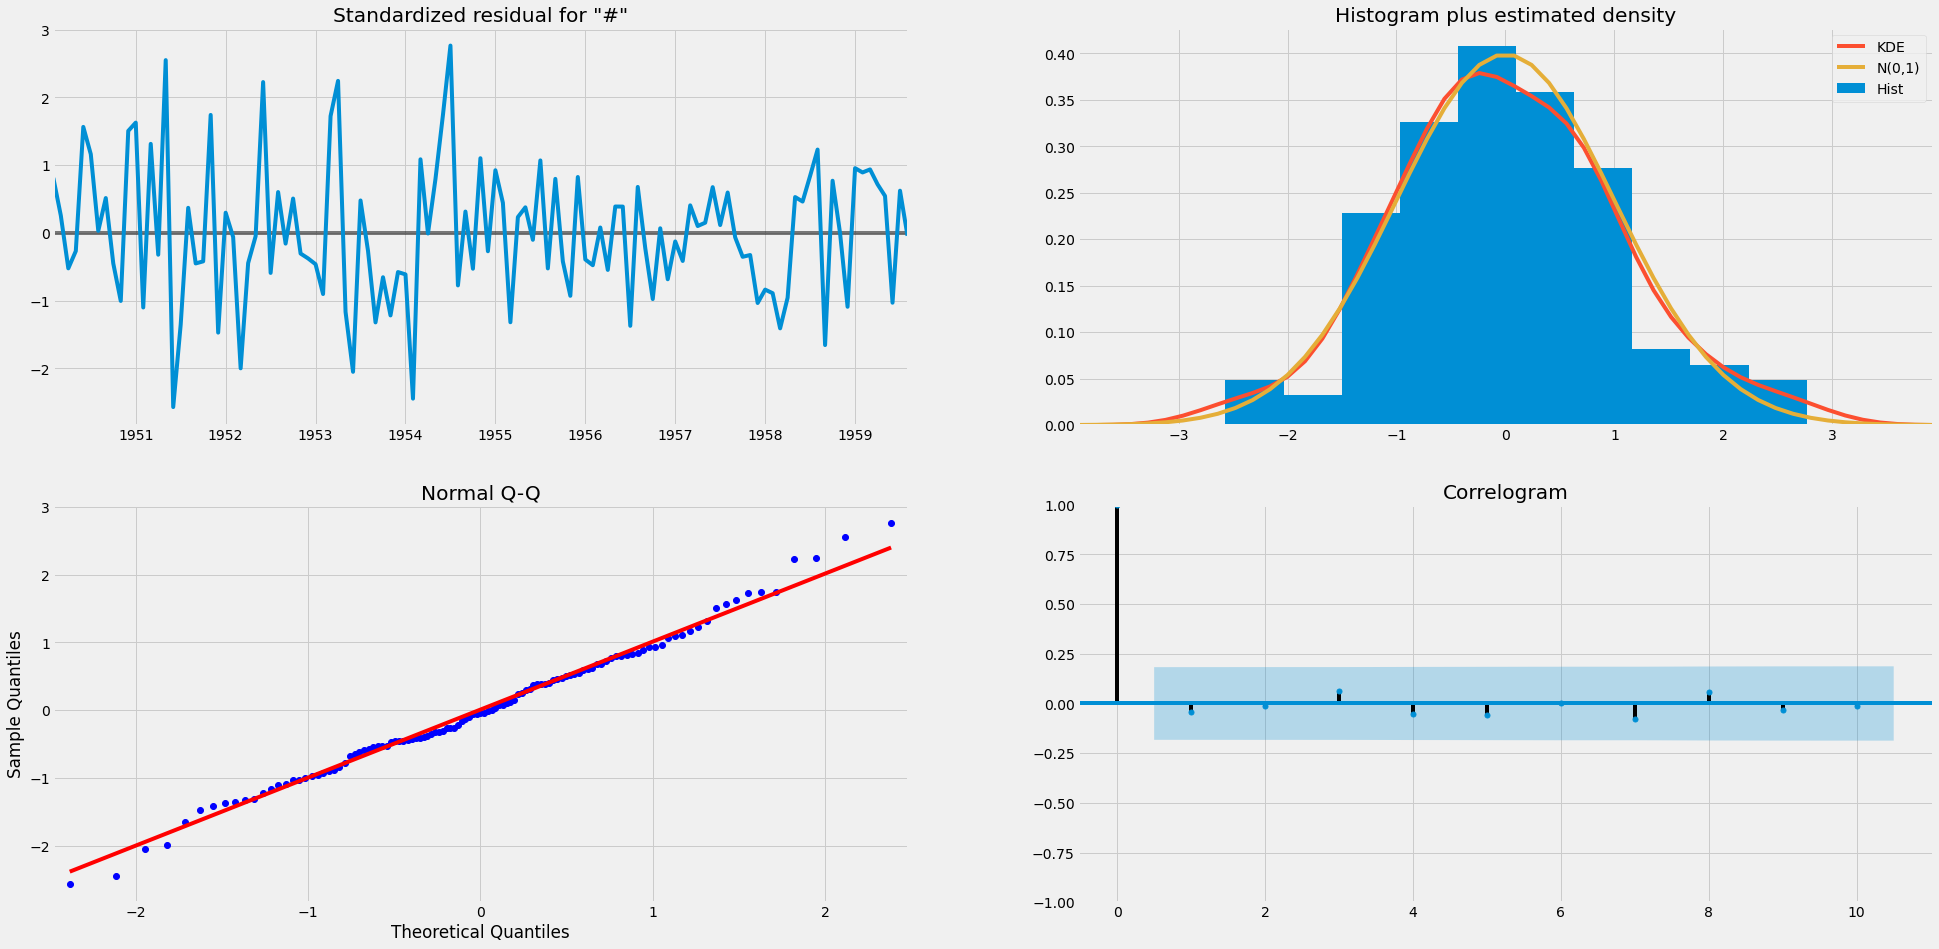

In [42]:
x = model_fit_arma.plot_diagnostics(figsize=(30,15))